In [1]:
import numpy as np
import requests as reqs
import pandas as pd 
import bs4
from bs4 import BeautifulSoup as soup
import datetime as dt 
import matplotlib.pyplot as plt 
import matplotlib.dates as pltdate

# Part 1: Data scraping and preparating
# Step 1: scrape your competitor's Data

In [2]:
#(2) Use reqs to get the url
sp_we_liv = reqs.get("https://cmsc320.github.io/files/top-50-solar-flares.html")

In [3]:
#(3 & 4) Extract the text, read and parse the data using soup
sp_we_liv_txt = soup(sp_we_liv.text, "html.parser")

In [4]:
#(5) Use prettify() to view the content and find the appropriate table
print(sp_we_liv_txt.prettify()[:256])

<!DOCTYPE html>
<html class="fontawesome-i2svg-active fontawesome-i2svg-complete" lang="en">
 <head>
  <meta content="text/html; charset=utf-8" http-equiv="content-type"/>
  <title>
   Top 50 solar flares | Solar activity | SpaceWeatherLive.com
  </title>



In [5]:
#(6) Use find() to save the aforementioned table as a variable
sp_we_liv_table = sp_we_liv_txt.find("table", {"class":"table table-striped table-responsive-md"})
print(sp_we_liv_table.text)

RegionStartMaximumEnd1X28+2003/11/04048619:2919:5320:06 MovieView archive2X20+2001/04/02939321:3221:5122:03 MovieView archive3X17.2+2003/10/28048609:5111:1011:24 MovieView archive4X17+2005/09/07080817:1717:4018:03 MovieView archive5X14.42001/04/15941513:1913:5013:55 MovieView archive6X102003/10/29048620:3720:4921:01 MovieView archive7X9.41997/11/06810011:4911:5512:01 MovieView archive8X9.32017/09/06267311:5312:0212:10 MovieView archive9X92006/12/05093010:1810:3510:45 MovieView archive10X8.32003/11/02048617:0317:2517:39 MovieView archive11X8.22017/09/10267315:3516:0616:31 MovieView archive12X7.12005/01/20072006:3607:0107:26 MovieView archive13X6.92011/08/09126307:4808:0508:08 MovieView archive14X6.52006/12/06093018:2918:4719:00 MovieView archive15X6.22005/09/09080819:1320:0420:36 MovieView archive16X6.22001/12/13973314:2014:3014:35 MovieView archive17X5.72000/07/14907710:0310:2410:43 MovieView archive18X5.62001/04/06941519:1019:2119:31 MovieView archive19X5.42012/03/07142900:0200:2400:4

In [6]:
#(7) Use pandas to read in the HTML file to SWL table
sp_we_liv = pd.read_html(sp_we_liv_table.prettify(), flavor="bs4")[0]
sp_we_liv.head(10)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Region,Start,Maximum,End,Unnamed: 7
0,1,X28+,2003/11/04,486,19:29,19:53,20:06,Movie View archive
1,2,X20+,2001/04/02,9393,21:32,21:51,22:03,Movie View archive
2,3,X17.2+,2003/10/28,486,09:51,11:10,11:24,Movie View archive
3,4,X17+,2005/09/07,808,17:17,17:40,18:03,Movie View archive
4,5,X14.4,2001/04/15,9415,13:19,13:50,13:55,Movie View archive
5,6,X10,2003/10/29,486,20:37,20:49,21:01,Movie View archive
6,7,X9.4,1997/11/06,8100,11:49,11:55,12:01,Movie View archive
7,8,X9.3,2017/09/06,2673,11:53,12:02,12:10,Movie View archive
8,9,X9,2006/12/05,930,10:18,10:35,10:45,Movie View archive
9,10,X8.3,2003/11/02,486,17:03,17:25,17:39,Movie View archive


In [7]:
#(8) Set the names of the SWL table
sp_we_liv = sp_we_liv.rename(columns={'Unnamed: 0':'rank', 'Unnamed: 1':'x_class',                                         'Unnamed: 2':'date', 'Region':'region',  
                                       'Start':'start_time', 'Maximum':'max_time',                                        'End':'end_time', 'Unnamed: 7':'movie'})
sp_we_liv.head(10)

,rank,x_class,date,region,start_time,max_time,end_time,movie
0,1,X28+,2003/11/04,486,19:29,19:53,20:06,Movie View archive
1,2,X20+,2001/04/02,9393,21:32,21:51,22:03,Movie View archive
2,3,X17.2+,2003/10/28,486,09:51,11:10,11:24,Movie View archive
3,4,X17+,2005/09/07,808,17:17,17:40,18:03,Movie View archive
4,5,X14.4,2001/04/15,9415,13:19,13:50,13:55,Movie View archive
5,6,X10,2003/10/29,486,20:37,20:49,21:01,Movie View archive
6,7,X9.4,1997/11/06,8100,11:49,11:55,12:01,Movie View archive
7,8,X9.3,2017/09/06,2673,11:53,12:02,12:10,Movie View archive
8,9,X9,2006/12/05,930,10:18,10:35,10:45,Movie View archive
9,10,X8.3,2003/11/02,486,17:03,17:25,17:39,Movie View archive


# Step 2: Tidy the top 50 solar flare data

In [8]:
# (1) Drop the last column of the table
sp_we_liv = sp_we_liv.drop('movie', axis=1)
sp_we_liv.head(10)

,rank,x_class,date,region,start_time,max_time,end_time
0,1,X28+,2003/11/04,486,19:29,19:53,20:06
1,2,X20+,2001/04/02,9393,21:32,21:51,22:03
2,3,X17.2+,2003/10/28,486,09:51,11:10,11:24
3,4,X17+,2005/09/07,808,17:17,17:40,18:03
4,5,X14.4,2001/04/15,9415,13:19,13:50,13:55
5,6,X10,2003/10/29,486,20:37,20:49,21:01
6,7,X9.4,1997/11/06,8100,11:49,11:55,12:01
7,8,X9.3,2017/09/06,2673,11:53,12:02,12:10
8,9,X9,2006/12/05,930,10:18,10:35,10:45
9,10,X8.3,2003/11/02,486,17:03,17:25,17:39


In [9]:
#(2 & 3) Use datetime import to combine and update the value
# date--->start_time
# date--->max_time
# date--->end_time 
# into three datetime columns
start_time_col = []
max_time_col = []
end_time_col = []

# for loop in table
for index, row in sp_we_liv.iterrows():
    new_date = row['date'].split('/')
    date = dt.date(int(new_date[0]), int(new_date[1]), int(new_date[2]))
    
    #satrt_time colunm combine
    # date--->start_time
    new_start_time = row['start_time'].split(':')
    start_time = dt.time(int(new_start_time[0]), int(new_start_time[1]))
    
    # max_time colunm combine
    # date--->max_time
    new_maximum_time = row['max_time'].split(':')
    maximum_time = dt.time(int(new_maximum_time[0]), int(new_maximum_time[1]))
    
    # end_time_colunm combine
    # end_time_col = []
    new_end_time = row['end_time'].split(':')
    end_time = dt.time(int(new_end_time[0]), int(new_end_time[1]))
    
    #append the combine data into the array
    start_time_col.append(dt.datetime.combine(date, start_time))
    max_time_col.append(dt.datetime.combine(date, maximum_time))
    end_time_col.append(dt.datetime.combine(date, end_time))
    
# drop and insert the new ones
#from end_time to start_time to date--->max_time
sp_we_liv = sp_we_liv.drop('end_time', axis=1).drop('max_time', axis=1).drop('start_time', axis=1).drop('date', axis=1)
sp_we_liv.insert(loc=2, column='end_datetime', value=end_time_col)
sp_we_liv.insert(loc=2, column='max_datetime', value=max_time_col)
sp_we_liv.insert(loc=2, column='start_datetime', value=start_time_col)

#print the first 10 rows
sp_we_liv.head(10)

,rank,x_class,start_datetime,max_datetime,end_datetime,region
0,1,X28+,2003-11-04 19:29:00,2003-11-04 19:53:00,2003-11-04 20:06:00,486
1,2,X20+,2001-04-02 21:32:00,2001-04-02 21:51:00,2001-04-02 22:03:00,9393
2,3,X17.2+,2003-10-28 09:51:00,2003-10-28 11:10:00,2003-10-28 11:24:00,486
3,4,X17+,2005-09-07 17:17:00,2005-09-07 17:40:00,2005-09-07 18:03:00,808
4,5,X14.4,2001-04-15 13:19:00,2001-04-15 13:50:00,2001-04-15 13:55:00,9415
5,6,X10,2003-10-29 20:37:00,2003-10-29 20:49:00,2003-10-29 21:01:00,486
6,7,X9.4,1997-11-06 11:49:00,1997-11-06 11:55:00,1997-11-06 12:01:00,8100
7,8,X9.3,2017-09-06 11:53:00,2017-09-06 12:02:00,2017-09-06 12:10:00,2673
8,9,X9,2006-12-05 10:18:00,2006-12-05 10:35:00,2006-12-05 10:45:00,930
9,10,X8.3,2003-11-02 17:03:00,2003-11-02 17:25:00,2003-11-02 17:39:00,486


In [10]:
# (4) Set region code '-' as NaN
sp_we_liv = sp_we_liv.replace('-', np.NaN)
sp_we_liv.head(10)

,rank,x_class,start_datetime,max_datetime,end_datetime,region
0,1,X28+,2003-11-04 19:29:00,2003-11-04 19:53:00,2003-11-04 20:06:00,486
1,2,X20+,2001-04-02 21:32:00,2001-04-02 21:51:00,2001-04-02 22:03:00,9393
2,3,X17.2+,2003-10-28 09:51:00,2003-10-28 11:10:00,2003-10-28 11:24:00,486
3,4,X17+,2005-09-07 17:17:00,2005-09-07 17:40:00,2005-09-07 18:03:00,808
4,5,X14.4,2001-04-15 13:19:00,2001-04-15 13:50:00,2001-04-15 13:55:00,9415
5,6,X10,2003-10-29 20:37:00,2003-10-29 20:49:00,2003-10-29 21:01:00,486
6,7,X9.4,1997-11-06 11:49:00,1997-11-06 11:55:00,1997-11-06 12:01:00,8100
7,8,X9.3,2017-09-06 11:53:00,2017-09-06 12:02:00,2017-09-06 12:10:00,2673
8,9,X9,2006-12-05 10:18:00,2006-12-05 10:35:00,2006-12-05 10:45:00,930
9,10,X8.3,2003-11-02 17:03:00,2003-11-02 17:25:00,2003-11-02 17:39:00,486


# Step 3: Scrape the NASA data 

In [11]:
# Scrape the data from the NASA url
nasa_data = reqs.get('http://www.hcbravo.org/IntroDataSci/misc/waves_type2.html')
print(nasa_data.text[:400])

<html><body>
<h2>Wind/WAVES type II bursts and CMEs</h2>
<a href="waves_type2_description.htm">A Brief Description</a>
<pre>
NOTE: List includes DH type II bursts observed by Wind spacecraft, 
but after STEREO launch on Oct 2006 the start and end times and 
frequencies of bursts are determined using both Wind and STEREO 
observations



In [12]:
#(Task 1) Use soup to read from the nasa url and parse
nasa_txt = soup(nasa_data.text, "html.parser")
print(nasa_txt.prettify()[:147])

<html>
 <body>
  <h2>
   Wind/WAVES type II bursts and CMEs
  </h2>
  <a href="waves_type2_description.htm">
   A Brief Description
  </a>
  <pre>



In [13]:
# Show this beautiful table with Dh type II, Flare, CME with Plots
# by using find()
nasa_html = nasa_txt.find("pre")
print(nasa_html.getText()[:995])


NOTE: List includes DH type II bursts observed by Wind spacecraft, 
but after STEREO launch on Oct 2006 the start and end times and 
frequencies of bursts are determined using both Wind and STEREO 
observations

                DH Type II                       Flare                     CME                   
----------------------------------------   -----------------   --------------------------   Plots
Start            End          Frequency     Loc   NOAA  Imp    Date  Time CPA  Width  Spd        
(1)        (2)   (3)   (4)   (5)    (6)     (7)    (8)  (9)    (10)  (11) (12)  (13) (14)   (15) 
1997/04/01 14:00 04/01 14:15  8000  4000   S25E16  8026 M1.3   04/01 15:18   74   79  312   PHTX
1997/04/07 14:30 04/07 17:30 11000  1000   S28E19  8027 C6.8   04/07 14:27 Halo  360  878   PHTX



In [14]:
# Using splitline to get the text and show the next 10 rows from previous table
nasa_line = nasa_html.getText().splitlines()
nasa_line = nasa_line[12:-2]
nasa_line[0:5]

['1997/04/01 14:00 04/01 14:15  8000  4000   S25E16  8026 M1.3   04/01 15:18   74   79  312   PHTX',
 '1997/04/07 14:30 04/07 17:30 11000  1000   S28E19  8027 C6.8   04/07 14:27 Halo  360  878   PHTX',
 '1997/05/12 05:15 05/14 16:00 12000    80   N21W08  8038 C1.3   05/12 05:30 Halo  360  464   PHTX',
 '1997/05/21 20:20 05/21 22:00  5000   500   N05W12  8040 M1.3   05/21 21:00  263  165  296   PHTX',
 '1997/09/23 21:53 09/23 22:16  6000  2000   S29E25  8088 C1.4   09/23 22:02  133  155  712   PHTX']

In [15]:
# Use split to see what will be in each column of nasa table
# Separate each line of text into a data row
#like satrt_date, start_time, end_date...
nasa_line[0].split()

['1997/04/01',
 '14:00',
 '04/01',
 '14:15',
 '8000',
 '4000',
 'S25E16',
 '8026',
 'M1.3',
 '04/01',
 '15:18',
 '74',
 '79',
 '312',
 'PHTX']

In [16]:
#(1 & 2) Create a DataFrame at this point so be use later
# Chose appropriate names for columns
nasa = pd.DataFrame()
lines = []
for line in nasa_line: # for loop into table
    lines.append(line.split()[:14]) #append then to nasa for 14 lines split
nasa = nasa.append(lines)
nasa.columns = ["Start Date", "Start Time", "End Date", "End Time", "Start Frequency",
                "End Frequency", "Flare Location", "Flare Region", "Flare Classification",
                "CME Date", "CME Time", "CME Angle", "CME Width", "CME Speed"]
#Show table
nasa.head(10) 

,Start Date,Start Time,End Date,End Time,Start Frequency,End Frequency,Flare Location,Flare Region,Flare Classification,CME Date,CME Time,CME Angle,CME Width,CME Speed
0,1997/04/01,14:00,04/01,14:15,8000,4000,S25E16,8026,M1.3,04/01,15:18,74,79,312
1,1997/04/07,14:30,04/07,17:30,11000,1000,S28E19,8027,C6.8,04/07,14:27,Halo,360,878
2,1997/05/12,05:15,05/14,16:00,12000,80,N21W08,8038,C1.3,05/12,05:30,Halo,360,464
3,1997/05/21,20:20,05/21,22:00,5000,500,N05W12,8040,M1.3,05/21,21:00,263,165,296
4,1997/09/23,21:53,09/23,22:16,6000,2000,S29E25,8088,C1.4,09/23,22:02,133,155,712
5,1997/11/03,05:15,11/03,12:00,14000,250,S20W13,8100,C8.6,11/03,05:28,240,109,227
6,1997/11/03,10:30,11/03,11:30,14000,5000,S16W21,8100,M4.2,11/03,11:11,233,122,352
7,1997/11/04,06:00,11/05,04:30,14000,100,S14W33,8100,X2.1,11/04,06:10,Halo,360,785
8,1997/11/06,12:20,11/07,08:30,14000,100,S18W63,8100,X9.4,11/06,12:10,Halo,360,1556
9,1997/11/27,13:30,11/27,14:00,14000,7000,N17E63,8113,X2.6,11/27,13:56,98,91,441


# Step 4: Tidy up the nasa table 

In [17]:
nasa = pd.DataFrame()
lines = []
for line in nasa_line: # for loop into table
    lines.append(line.split()[:15]) #append then to nasa for 14 lines split
nasa = nasa.append(lines)
nasa.columns = ["Start Date", "Start Time", "End Date", "End Time", "Start Frequency",
                "End Frequency", "Flare Location", "Flare Region", "Flare Classification",
                "CME Date", "CME Time", "CME Angle", "CME Width", "CME Speed", "plot"]
nasa.head(10)

,Start Date,Start Time,End Date,End Time,Start Frequency,End Frequency,Flare Location,Flare Region,Flare Classification,CME Date,CME Time,CME Angle,CME Width,CME Speed,plot
0,1997/04/01,14:00,04/01,14:15,8000,4000,S25E16,8026,M1.3,04/01,15:18,74,79,312,PHTX
1,1997/04/07,14:30,04/07,17:30,11000,1000,S28E19,8027,C6.8,04/07,14:27,Halo,360,878,PHTX
2,1997/05/12,05:15,05/14,16:00,12000,80,N21W08,8038,C1.3,05/12,05:30,Halo,360,464,PHTX
3,1997/05/21,20:20,05/21,22:00,5000,500,N05W12,8040,M1.3,05/21,21:00,263,165,296,PHTX
4,1997/09/23,21:53,09/23,22:16,6000,2000,S29E25,8088,C1.4,09/23,22:02,133,155,712,PHTX
5,1997/11/03,05:15,11/03,12:00,14000,250,S20W13,8100,C8.6,11/03,05:28,240,109,227,PHTX
6,1997/11/03,10:30,11/03,11:30,14000,5000,S16W21,8100,M4.2,11/03,11:11,233,122,352,PHTX
7,1997/11/04,06:00,11/05,04:30,14000,100,S14W33,8100,X2.1,11/04,06:10,Halo,360,785,PHTX
8,1997/11/06,12:20,11/07,08:30,14000,100,S18W63,8100,X9.4,11/06,12:10,Halo,360,1556,PHTX
9,1997/11/27,13:30,11/27,14:00,14000,7000,N17E63,8113,X2.6,11/27,13:56,98,91,441,PHTX


In [18]:
#(1) Recode any missing entries as NaN
nasa = nasa.replace(['-----', '----', '--/--', '--:--'], np.NAN)
nasa['Flare Classification'] = nasa['Flare Classification'].replace('FILA', np.NAN)
nasa.head(10)

,Start Date,Start Time,End Date,End Time,Start Frequency,End Frequency,Flare Location,Flare Region,Flare Classification,CME Date,CME Time,CME Angle,CME Width,CME Speed,plot
0,1997/04/01,14:00,04/01,14:15,8000,4000,S25E16,8026,M1.3,04/01,15:18,74,79,312,PHTX
1,1997/04/07,14:30,04/07,17:30,11000,1000,S28E19,8027,C6.8,04/07,14:27,Halo,360,878,PHTX
2,1997/05/12,05:15,05/14,16:00,12000,80,N21W08,8038,C1.3,05/12,05:30,Halo,360,464,PHTX
3,1997/05/21,20:20,05/21,22:00,5000,500,N05W12,8040,M1.3,05/21,21:00,263,165,296,PHTX
4,1997/09/23,21:53,09/23,22:16,6000,2000,S29E25,8088,C1.4,09/23,22:02,133,155,712,PHTX
5,1997/11/03,05:15,11/03,12:00,14000,250,S20W13,8100,C8.6,11/03,05:28,240,109,227,PHTX
6,1997/11/03,10:30,11/03,11:30,14000,5000,S16W21,8100,M4.2,11/03,11:11,233,122,352,PHTX
7,1997/11/04,06:00,11/05,04:30,14000,100,S14W33,8100,X2.1,11/04,06:10,Halo,360,785,PHTX
8,1997/11/06,12:20,11/07,08:30,14000,100,S18W63,8100,X9.4,11/06,12:10,Halo,360,1556,PHTX
9,1997/11/27,13:30,11/27,14:00,14000,7000,N17E63,8113,X2.6,11/27,13:56,98,91,441,PHTX


In [19]:
nasa.dropna

<bound method DataFrame.dropna of      Start Date Start Time End Date End Time Start Frequency End Frequency  \
0    1997/04/01      14:00    04/01    14:15            8000          4000   
1    1997/04/07      14:30    04/07    17:30           11000          1000   
2    1997/05/12      05:15    05/14    16:00           12000            80   
3    1997/05/21      20:20    05/21    22:00            5000           500   
4    1997/09/23      21:53    09/23    22:16            6000          2000   
..          ...        ...      ...      ...             ...           ...   
477  2014/12/13      14:27    12/13    14:51           14000          3900   
478  2014/12/17      04:09    12/17    04:19            2900          2100   
479  2014/12/17      05:00    12/17    05:09           14000         11500   
480  2014/12/18      22:31    12/18    22:54            5100          1300   
481  2014/12/21      12:05    12/21    12:28           14000          7400   

    Flare Location Flare Regi

In [20]:
# (2) Create a new column that indicates if a row corresponds to a halo flares or not
nasa.insert(loc=15, column='Halo', value=np.where(nasa['CME Angle'] == 'Halo', True, False))
# a replace Halo entries in the cme_angle column as NaN
nasa = nasa.replace('Halo', np.NaN)
#show this beautiful table
nasa.head(10)

,Start Date,Start Time,End Date,End Time,Start Frequency,End Frequency,Flare Location,Flare Region,Flare Classification,CME Date,CME Time,CME Angle,CME Width,CME Speed,plot,Halo
0,1997/04/01,14:00,04/01,14:15,8000,4000,S25E16,8026,M1.3,04/01,15:18,74,79,312,PHTX,False
1,1997/04/07,14:30,04/07,17:30,11000,1000,S28E19,8027,C6.8,04/07,14:27,NaN,360,878,PHTX,True
2,1997/05/12,05:15,05/14,16:00,12000,80,N21W08,8038,C1.3,05/12,05:30,NaN,360,464,PHTX,True
3,1997/05/21,20:20,05/21,22:00,5000,500,N05W12,8040,M1.3,05/21,21:00,263,165,296,PHTX,False
4,1997/09/23,21:53,09/23,22:16,6000,2000,S29E25,8088,C1.4,09/23,22:02,133,155,712,PHTX,False
5,1997/11/03,05:15,11/03,12:00,14000,250,S20W13,8100,C8.6,11/03,05:28,240,109,227,PHTX,False
6,1997/11/03,10:30,11/03,11:30,14000,5000,S16W21,8100,M4.2,11/03,11:11,233,122,352,PHTX,False
7,1997/11/04,06:00,11/05,04:30,14000,100,S14W33,8100,X2.1,11/04,06:10,NaN,360,785,PHTX,True
8,1997/11/06,12:20,11/07,08:30,14000,100,S18W63,8100,X9.4,11/06,12:10,NaN,360,1556,PHTX,True
9,1997/11/27,13:30,11/27,14:00,14000,7000,N17E63,8113,X2.6,11/27,13:56,98,91,441,PHTX,False


In [21]:
#(3) Create a new column that indicate if width is as lower bound and remove
# any non-numeric part of width column
nasa.insert(loc=16, column='Lower Bound', value=[isinstance(x, str) and x[0] == '>' for x in nasa['CME Width']])
nasa['CME Width'] = [x[1:] if isinstance(x, str) and x[0] == '>' else x for x in nasa['CME Width']]
nasa.head(10)

,Start Date,Start Time,End Date,End Time,Start Frequency,End Frequency,Flare Location,Flare Region,Flare Classification,CME Date,CME Time,CME Angle,CME Width,CME Speed,plot,Halo,Lower Bound
0,1997/04/01,14:00,04/01,14:15,8000,4000,S25E16,8026,M1.3,04/01,15:18,74,79,312,PHTX,False,False
1,1997/04/07,14:30,04/07,17:30,11000,1000,S28E19,8027,C6.8,04/07,14:27,NaN,360,878,PHTX,True,False
2,1997/05/12,05:15,05/14,16:00,12000,80,N21W08,8038,C1.3,05/12,05:30,NaN,360,464,PHTX,True,False
3,1997/05/21,20:20,05/21,22:00,5000,500,N05W12,8040,M1.3,05/21,21:00,263,165,296,PHTX,False,False
4,1997/09/23,21:53,09/23,22:16,6000,2000,S29E25,8088,C1.4,09/23,22:02,133,155,712,PHTX,False,False
5,1997/11/03,05:15,11/03,12:00,14000,250,S20W13,8100,C8.6,11/03,05:28,240,109,227,PHTX,False,False
6,1997/11/03,10:30,11/03,11:30,14000,5000,S16W21,8100,M4.2,11/03,11:11,233,122,352,PHTX,False,False
7,1997/11/04,06:00,11/05,04:30,14000,100,S14W33,8100,X2.1,11/04,06:10,NaN,360,785,PHTX,True,False
8,1997/11/06,12:20,11/07,08:30,14000,100,S18W63,8100,X9.4,11/06,12:10,NaN,360,1556,PHTX,True,False
9,1997/11/27,13:30,11/27,14:00,14000,7000,N17E63,8113,X2.6,11/27,13:56,98,91,441,PHTX,False,False


In [22]:
#(4) Combine date and time columns for 
#date & Time----> start_dateTime
#date & Time----> end_dateTime
#date & Time----> cme_dateTime
nasa_start_times = []
nasa_end_times = []
nasa_cme_times = []
# split the Start date & Time
for index, row in nasa.iterrows():
    start_time_str = row['Start Time'].split(':')
    start_date_str = row['Start Date'].split('/')
    #date & Time----> start_dateTime combine
    start_time = dt.time(int(start_time_str[0]), int(start_time_str[1]))
    start_date = dt.date(int(start_date_str[0]), int(start_date_str[1]), int(start_date_str[2]))
    #date & Time----> end_dateTime combine
    end_time_str = row['End Time'].split(':')
    end_date_str = row['End Date'].split('/')
    end_date = dt.date(int(start_date_str[0]), int(end_date_str[0]), int(end_date_str[1]))
    
    if int(end_time_str[0]) >= 0:
        end_time_str[0] = int(end_time_str[0]) % 24
        end_date + dt.timedelta(days=1)
    
    end_time = dt.time(int(end_time_str[0]), int(end_time_str[1]))
    #appending start and end time n date
    nasa_start_times.append(dt.datetime.combine(start_date, start_time))
    nasa_end_times.append(dt.datetime.combine(end_date, end_time))
    
    if isinstance(row['CME Time'], str) and isinstance(row['CME Date'], str):
        cme_time_str = row['CME Time'].split(':')
        cme_date_str = row['CME Date'].split('/')
        #date & Time----> cme_dateTime combine
        cme_time = dt.time(int(cme_time_str[0]), int(cme_time_str[1]))
        cme_date = dt.date(int(start_date_str[0]), int(cme_date_str[0]), int(cme_date_str[0]))
        #appending cme date n time
        nasa_cme_times.append(dt.datetime.combine(cme_date, cme_time))
    else:
        nasa_cme_times.append(np.NAN)
#droping old columns and inserting the combine ones 
nasa = nasa.drop('End Time', axis=1).drop('Start Time', axis=1).drop('End Date', axis=1).drop('Start Date', axis=1)
nasa = nasa.drop('CME Time', axis=1).drop('CME Date', axis=1)
nasa.insert(loc=3, column='CME DateTime', value=nasa_cme_times)
nasa.insert(loc=0, column='End DateTime', value=nasa_end_times)
nasa.insert(loc=0, column='Start DateTime', value=nasa_start_times)
#show the beautiful table
nasa.head(1) 

,Start DateTime,End DateTime,Start Frequency,End Frequency,Flare Location,CME DateTime,Flare Region,Flare Classification,CME Angle,CME Width,CME Speed,plot,Halo,Lower Bound
0,1997-04-01 14:00:00,1997-04-01 14:15:00,8000,4000,S25E16,1997-04-04 15:18:00,8026,M1.3,74,79,312,PHTX,False,False


In [23]:
#The output of this step should looks like this 
nasa_tidy = nasa.rename(columns={'Start DateTime':'start_datetime', 
                                  'End DateTime':'end_datetime',                                                                   'Start Frequency':'start_frequency',
                                  'End Frequency':'end_frequency', 
                                  'Flare Location':'flare_location',
                                  'Flare Region':'flare_region',
                                  'Flare Classification':'importance',
                                  'CME DateTime':'cme_datetime',
                                  'CME Angle':'cpa', 'CME Width':'width', 'CME Speed':'speed',
                                  'Halo':'is_halo', 'Lower Bound':'width_lower_bound'
                                   })
nasa_tidy.head(10)

,start_datetime,end_datetime,start_frequency,end_frequency,flare_location,cme_datetime,flare_region,importance,cpa,width,speed,plot,is_halo,width_lower_bound
0,1997-04-01 14:00:00,1997-04-01 14:15:00,8000,4000,S25E16,1997-04-04 15:18:00,8026,M1.3,74,79,312,PHTX,False,False
1,1997-04-07 14:30:00,1997-04-07 17:30:00,11000,1000,S28E19,1997-04-04 14:27:00,8027,C6.8,NaN,360,878,PHTX,True,False
2,1997-05-12 05:15:00,1997-05-14 16:00:00,12000,80,N21W08,1997-05-05 05:30:00,8038,C1.3,NaN,360,464,PHTX,True,False
3,1997-05-21 20:20:00,1997-05-21 22:00:00,5000,500,N05W12,1997-05-05 21:00:00,8040,M1.3,263,165,296,PHTX,False,False
4,1997-09-23 21:53:00,1997-09-23 22:16:00,6000,2000,S29E25,1997-09-09 22:02:00,8088,C1.4,133,155,712,PHTX,False,False
5,1997-11-03 05:15:00,1997-11-03 12:00:00,14000,250,S20W13,1997-11-11 05:28:00,8100,C8.6,240,109,227,PHTX,False,False
6,1997-11-03 10:30:00,1997-11-03 11:30:00,14000,5000,S16W21,1997-11-11 11:11:00,8100,M4.2,233,122,352,PHTX,False,False
7,1997-11-04 06:00:00,1997-11-05 04:30:00,14000,100,S14W33,1997-11-11 06:10:00,8100,X2.1,NaN,360,785,PHTX,True,False
8,1997-11-06 12:20:00,1997-11-07 08:30:00,14000,100,S18W63,1997-11-11 12:10:00,8100,X9.4,NaN,360,1556,PHTX,True,False
9,1997-11-27 13:30:00,1997-11-27 14:00:00,14000,7000,N17E63,1997-11-11 13:56:00,8113,X2.6,98,91,441,PHTX,False,False


# Part 2: Analysis
# Question 1: Replication

In [24]:
# The top 50 solar flare base on their classification using data fron nasa
# Use their magnitude
def magnitude(x):
    if isinstance(x, float) and np.isnan(x):
        return 0
    
    #Remove non alphanumerical component from data
    if x[-1] == '+':
        x = x[:-1]
        
    #Calculate magnitude, ex. X4.5 -> 4.5*10^4
    return (10**({'A':0,'B':1,'C':2,'M':3,'X':4}[x[0]]))*float(x[1:])

#The last 50 rows of the sorted data represent the 50 largest flares by magnitude.
# pip install -U pandas (to be able to use key)
nasa_top_sf = nasa.sort_values(by=['Flare Classification'], key=lambda x: x.map(magnitude)).tail(50)
#show table
nasa_top_sf.head(10)

,Start DateTime,End DateTime,Start Frequency,End Frequency,Flare Location,CME DateTime,Flare Region,Flare Classification,CME Angle,CME Width,CME Speed,plot,Halo,Lower Bound
49,1999-10-14 09:10:00,1999-10-14 10:00:00,14000,4000,N11E32,1999-10-10 09:26:00,8731,X1.8,NaN,360,1250,PHTX,True,False
191,2002-07-18 07:55:00,2002-07-18 08:45:00,14000,1500,N19W30,2002-07-07 08:06:00,10030,X1.8,NaN,360,1099,PHTX,True,False
102,2000-11-24 22:24:00,2000-11-24 22:36:00,4000,3000,N21W14,2000-11-11 22:06:00,9236,X1.8,NaN,360,1005,PHTX,True,False
104,2000-11-25 19:00:00,2000-11-25 19:35:00,6000,2000,N20W23,2000-11-11 19:31:00,9236,X1.9,NaN,360,671,PHTX,True,False
287,2005-01-17 09:25:00,2005-01-17 16:00:00,14000,30,N15W25,2005-01-01 09:30:00,10720,X2.0,NaN,360,2094,PHTX,True,False
100,2000-11-24 05:10:00,2000-11-24 15:00:00,14000,100,N20W05,2000-11-11 05:30:00,9236,X2.0,NaN,360,1289,PHTX,True,False
127,2001-04-12 10:20:00,2001-04-12 10:40:00,14000,7000,S19W43,2001-04-04 10:31:00,9415,X2.0,NaN,360,1184,PHTX,True,False
276,2004-11-07 16:25:00,2004-11-08 20:00:00,14000,60,N09W17,2004-11-11 16:54:00,10696,X2.0,NaN,360,1759,PHTX,True,False
362,2011-09-06 22:30:00,2011-09-07 15:40:00,16000,150,N14W18,2011-09-09 23:05:00,11283,X2.1,NaN,360,575,PHTX,True,False
421,2013-10-25 15:08:00,2013-10-25 22:32:00,16000,200,S06E69,2013-10-10 15:12:00,11882,X2.1,NaN,360,1081,PHTX,True,False


In [25]:
# Recall the SWL table
sp_we_liv.head(10)

,rank,x_class,start_datetime,max_datetime,end_datetime,region
0,1,X28+,2003-11-04 19:29:00,2003-11-04 19:53:00,2003-11-04 20:06:00,486
1,2,X20+,2001-04-02 21:32:00,2001-04-02 21:51:00,2001-04-02 22:03:00,9393
2,3,X17.2+,2003-10-28 09:51:00,2003-10-28 11:10:00,2003-10-28 11:24:00,486
3,4,X17+,2005-09-07 17:17:00,2005-09-07 17:40:00,2005-09-07 18:03:00,808
4,5,X14.4,2001-04-15 13:19:00,2001-04-15 13:50:00,2001-04-15 13:55:00,9415
5,6,X10,2003-10-29 20:37:00,2003-10-29 20:49:00,2003-10-29 21:01:00,486
6,7,X9.4,1997-11-06 11:49:00,1997-11-06 11:55:00,1997-11-06 12:01:00,8100
7,8,X9.3,2017-09-06 11:53:00,2017-09-06 12:02:00,2017-09-06 12:10:00,2673
8,9,X9,2006-12-05 10:18:00,2006-12-05 10:35:00,2006-12-05 10:45:00,930
9,10,X8.3,2003-11-02 17:03:00,2003-11-02 17:25:00,2003-11-02 17:39:00,486


# Interpretation of nasa_top_sf and the sp_we_liv table
The magnitude from the SpaceWeatherLive(SWL) is quite significant. 
Compare to the ones from NASA I can say that SWL magnitudes are smaller than NASA's

# Question 2: Inetgration
Use of three aspects to see if a flare exist in both SWL and NASA
A flare is function closely matched if there exists an entry in nasa table
the given flare begins within 4 hours and flare has magnitude +-10% 
and and also shares its region data with the nasa entry.


In [26]:
#A close enough match is tuple function of
# a possible match, the number of criteria
def close_enough(swl_row):
    matches = []
    #for loop in reach the nasa_top_sf elem
    for i, row in nasa_top_sf.iterrows():
        n = (abs((row[0]-swl_row[2]).total_seconds()) < 14400)*1 + \
        (abs(np.log10(magnitude(row[7])/magnitude(swl_row[1]))) < np.log10(1.1))*1 + \
        (int(row[6]) % 10000 == int(swl_row[5]))*1 
        
        if n >= 2:
            matches.append((i, n))
            
    matches.sort(key=lambda x: x[1], reverse=True)
    #if match then return the list
    #else return -1
    if len(matches) == 0:
        return -1
    else:
        return matches

matched = [close_enough(row) for i, row in sp_we_liv.iterrows()]
#insert match into the table
sp_we_liv.insert(loc=6, column='Matched', value=matched)
sp_we_liv.head(10)

,rank,x_class,start_datetime,max_datetime,end_datetime,region,Matched
0,1,X28+,2003-11-04 19:29:00,2003-11-04 19:53:00,2003-11-04 20:06:00,486,"[(242, 3)]"
1,2,X20+,2001-04-02 21:32:00,2001-04-02 21:51:00,2001-04-02 22:03:00,9393,"[(119, 3)]"
2,3,X17.2+,2003-10-28 09:51:00,2003-10-28 11:10:00,2003-10-28 11:24:00,486,"[(234, 3)]"
3,4,X17+,2005-09-07 17:17:00,2005-09-07 17:40:00,2005-09-07 18:03:00,808,-1
4,5,X14.4,2001-04-15 13:19:00,2001-04-15 13:50:00,2001-04-15 13:55:00,9415,"[(128, 3)]"
5,6,X10,2003-10-29 20:37:00,2003-10-29 20:49:00,2003-10-29 21:01:00,486,"[(235, 3)]"
6,7,X9.4,1997-11-06 11:49:00,1997-11-06 11:55:00,1997-11-06 12:01:00,8100,"[(8, 3)]"
7,8,X9.3,2017-09-06 11:53:00,2017-09-06 12:02:00,2017-09-06 12:10:00,2673,-1
8,9,X9,2006-12-05 10:18:00,2006-12-05 10:35:00,2006-12-05 10:45:00,930,"[(330, 3)]"
9,10,X8.3,2003-11-02 17:03:00,2003-11-02 17:25:00,2003-11-02 17:39:00,486,"[(238, 3)]"


In [27]:
# For each of the top 50 solar flares in the SpaceWeatherLive data
# find the best matching row from the NASA data
best_match = [-1 if isinstance(x, int) else x[0][0] for x in sp_we_liv['Matched']]
sp_we_liv.insert(loc=7, column='Best Match', value=best_match)
sp_we_liv.head(10)

,rank,x_class,start_datetime,max_datetime,end_datetime,region,Matched,Best Match
0,1,X28+,2003-11-04 19:29:00,2003-11-04 19:53:00,2003-11-04 20:06:00,486,"[(242, 3)]",242
1,2,X20+,2001-04-02 21:32:00,2001-04-02 21:51:00,2001-04-02 22:03:00,9393,"[(119, 3)]",119
2,3,X17.2+,2003-10-28 09:51:00,2003-10-28 11:10:00,2003-10-28 11:24:00,486,"[(234, 3)]",234
3,4,X17+,2005-09-07 17:17:00,2005-09-07 17:40:00,2005-09-07 18:03:00,808,-1,-1
4,5,X14.4,2001-04-15 13:19:00,2001-04-15 13:50:00,2001-04-15 13:55:00,9415,"[(128, 3)]",128
5,6,X10,2003-10-29 20:37:00,2003-10-29 20:49:00,2003-10-29 21:01:00,486,"[(235, 3)]",235
6,7,X9.4,1997-11-06 11:49:00,1997-11-06 11:55:00,1997-11-06 12:01:00,8100,"[(8, 3)]",8
7,8,X9.3,2017-09-06 11:53:00,2017-09-06 12:02:00,2017-09-06 12:10:00,2673,-1,-1
8,9,X9,2006-12-05 10:18:00,2006-12-05 10:35:00,2006-12-05 10:45:00,930,"[(330, 3)]",330
9,10,X8.3,2003-11-02 17:03:00,2003-11-02 17:25:00,2003-11-02 17:39:00,486,"[(238, 3)]",238


In [28]:
#checking for a possible ties break
#they are all unique so no ties break
sp_we_liv['Best Match'].value_counts()

-1      18
 289     1
 444     1
 123     1
 106     1
 376     1
 119     1
 202     1
 242     1
 240     1
 239     1
 238     1
 235     1
 234     1
 360     1
 290     1
 162     1
 19      1
 128     1
 286     1
 405     1
 404     1
 83      1
 144     1
 334     1
 333     1
 223     1
 330     1
 137     1
 8       1
 195     1
 194     1
 319     1
Name: Best Match, dtype: int64

In [29]:
#Ranking the top 50 in nasa table base on their flare classification column
ranks = [np.NAN] * len(nasa.index)
for i, row in sp_we_liv.iterrows():
    if not row[7] == -1:
        ranks[row[7]] = row[0]
        
nasa.insert(loc=13, column='Rank', value=ranks)
# ranking by flare classification
nasa_top_sf = nasa.sort_values(by=['Flare Classification'], key=lambda x: x.map(magnitude)).tail(50)

nasa_top_sf.head(10)

,Start DateTime,End DateTime,Start Frequency,End Frequency,Flare Location,CME DateTime,Flare Region,Flare Classification,CME Angle,CME Width,CME Speed,plot,Halo,Rank,Lower Bound
49,1999-10-14 09:10:00,1999-10-14 10:00:00,14000,4000,N11E32,1999-10-10 09:26:00,8731,X1.8,NaN,360,1250,PHTX,True,NaN,False
191,2002-07-18 07:55:00,2002-07-18 08:45:00,14000,1500,N19W30,2002-07-07 08:06:00,10030,X1.8,NaN,360,1099,PHTX,True,NaN,False
102,2000-11-24 22:24:00,2000-11-24 22:36:00,4000,3000,N21W14,2000-11-11 22:06:00,9236,X1.8,NaN,360,1005,PHTX,True,NaN,False
104,2000-11-25 19:00:00,2000-11-25 19:35:00,6000,2000,N20W23,2000-11-11 19:31:00,9236,X1.9,NaN,360,671,PHTX,True,NaN,False
287,2005-01-17 09:25:00,2005-01-17 16:00:00,14000,30,N15W25,2005-01-01 09:30:00,10720,X2.0,NaN,360,2094,PHTX,True,NaN,False
100,2000-11-24 05:10:00,2000-11-24 15:00:00,14000,100,N20W05,2000-11-11 05:30:00,9236,X2.0,NaN,360,1289,PHTX,True,NaN,False
127,2001-04-12 10:20:00,2001-04-12 10:40:00,14000,7000,S19W43,2001-04-04 10:31:00,9415,X2.0,NaN,360,1184,PHTX,True,NaN,False
276,2004-11-07 16:25:00,2004-11-08 20:00:00,14000,60,N09W17,2004-11-11 16:54:00,10696,X2.0,NaN,360,1759,PHTX,True,NaN,False
362,2011-09-06 22:30:00,2011-09-07 15:40:00,16000,150,N14W18,2011-09-09 23:05:00,11283,X2.1,NaN,360,575,PHTX,True,NaN,False
421,2013-10-25 15:08:00,2013-10-25 22:32:00,16000,200,S06E69,2013-10-10 15:12:00,11882,X2.1,NaN,360,1081,PHTX,True,NaN,False


# Question 3: Analysis
I will plot the logarithm in base 10 of the magnitude of individual observations
vs their CME Width and CME Speed respectively.

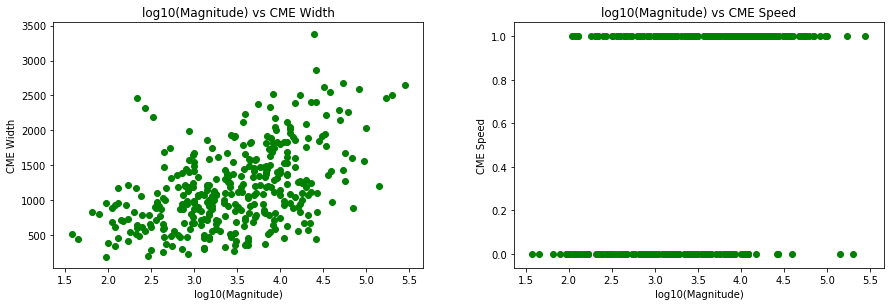

In [30]:
#(1 & 3) Plot attributes in the NASA dataset (e.g., starting or ending frequenciues, flare height or width) over time. Use graphical elements (e.g., text or points) to indicate flares in the top 50 classification.
nasa = nasa.replace('360h', '360')

magnitudes = []
widths = []
speeds = []

for index, row in nasa.iterrows():
    if magnitude(row[7]) == 0 or np.isnan(float(row[10])) or np.isnan(float(row[12])):
        continue
    magnitudes.append(np.log10(magnitude(row[7])))
    widths.append(float(row[10]))
    speeds.append(float(row[12]))

fig, ax = plt.subplots(1, 2)

fig.tight_layout()

ax[0].scatter(magnitudes, widths, color='g')
ax[0].set_title('log10(Magnitude) vs CME Width')
ax[0].set_ylabel('CME Width')
ax[0].set_xlabel('log10(Magnitude)')

ax[1].scatter(magnitudes, speeds, color='g')
ax[1].set_title('log10(Magnitude) vs CME Speed')
ax[1].set_ylabel('CME Speed')
ax[1].set_xlabel('log10(Magnitude)')

plt.subplots_adjust(right = 2)

# Interpretation
First Graph:
We can corralation between log10 and CMEs width. They cluster in time

Second Graph:
There is absolutely no corralation between both. 

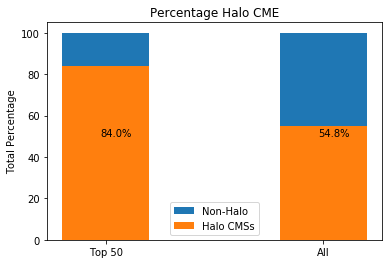

In [31]:
#(2) You can make a barplot that compares the number (or proportion) of Halo CMEs in the top 50 flares vs. the dataset as a whole.
labels = 'Top 50', 'All'

fig, ax = plt.subplots()
halo_prop = [nasa_top_sf['Halo'].value_counts()[True]/50 * 100, nasa['Halo'].value_counts()[True]/len(nasa.index) * 100]
n_halo_prop = [nasa_top_sf['Halo'].value_counts()[False]/50 * 100, nasa['Halo'].value_counts()[False]/len(nasa.index) * 100]

ax.bar(labels, n_halo_prop, .4, bottom=halo_prop, label='Non-Halo')
ax.bar(labels, halo_prop, .4, label='Halo CMSs')

ax.set_ylabel('Total Percentage')
ax.set_title('Percentage Halo CME')
ax.legend()
ax.text(-.025,50, '%.1f%%' % halo_prop[0])
ax.text(0.975,50, '%.1f%%' % halo_prop[1])

plt.show()



# Interpretation
Top 50 CMEs from NASA has higher percentage(84%) and proportion than the dataset in hole 
only (54%) percentage.

# The end of project 1